**Pandas 추가 이해: groupby**
1. 그룹화의 이유:

###### * 데이터를 특정 기준에 따라 세분화하고 각 그룹에 대한 특정 연산을 수행할 수 있습니다.  * 데이터의 패턴이나 특징을 파악하기 쉽고 간편하게 할 수 있습니다.
그룹화를 통해 데이터를 더 쉽게 이해하고 해석할 수 있습니다.

집계 함수 적용: groupby를 사용하면 각 그룹에 대해 다양한 집계 함수를 적용할 수 있습니다. 예를 들어, 평균, 합계, 표준편차 등을 계산할 수 있습니다.

데이터 탐색과 이해: 그룹화를 통해 데이터를 쉽게 탐색하고 이해할 수 있습니다. 특히 범주형 데이터에 유용하며, 각 범주에 대한 통계를 쉽게 확인할 수 있습니다.

시각화와 함께 사용: groupby 결과를 시각화하여 데이터의 패턴을 빠르게 파악할 수 있습니다. 그룹별로 시각화를 하면 데이터의 특성이나 추세를 시각적으로 이해하기 용이합니다.

데이터 전처리와 결합: 그룹화를 통해 데이터를 전처리하거나 다른 데이터프레임과 결합할 때 유용합니다. 그룹화된 데이터를 기준으로 다른 데이터프레임을 병합할 수 있습니다.

In [1]:
import pandas as pd

# 샘플 데이터 생성
data = {'city': ['Seoul', 'Seoul', 'Busan', 'Busan', 'Incheon', 'Incheon'],
        'population': [9, 10, 3, 4, 2, 2]}

df = pd.DataFrame(data)

# 도시(city)에 따른 인구(population)의 평균 계산
average_population = df.groupby('city')['population'].mean()

print(average_population)


city
Busan      3.5
Incheon    2.0
Seoul      9.5
Name: population, dtype: float64


### **데이터 병합 실습**


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\data\dataList\covid.csv", index_col=False, encoding="cp949" )
df

,항목,사례수,증가,감소,변화없음
0,스마트폰,999,78.9,1.7,19.4
1,텔레비전,965,68.5,3.9,27.6
2,개인용 PC,973,65.7,3.7,30.6
3,태블릿 PC,662,46.8,4.2,49.0
4,라디오,687,35.5,12.5,52.0
5,잡지·책,776,31.3,17.8,50.9
6,종이신문,552,17.6,23.2,59.2


In [3]:
df_max_num = df.sort_values(by='사례수', ascending=False)
df_max_num.loc[:0]

,항목,사례수,증가,감소,변화없음
0,스마트폰,999,78.9,1.7,19.4


In [4]:
df[:3]

,항목,사례수,증가,감소,변화없음
0,스마트폰,999,78.9,1.7,19.4
1,텔레비전,965,68.5,3.9,27.6
2,개인용 PC,973,65.7,3.7,30.6


In [14]:
df_vaccine = pd.read_csv(r"C:\data\dataList\vaccine.csv")
df_vaccine_2 = df_vaccine.copy()
df_vaccine.head()

,date,subject,day1num,day1sum,day1rate,day2num,day2sum,day2rate
0,2021.10.16,9505868,10673,7562283,79.6,66910,6191341,65.1
1,2021.10.15,9505868,14556,7551829,79.4,133580,6124432,64.4
2,2021.10.14,9505868,9609,7536654,79.3,94569,5989111,63.0
3,2021.10.13,9505868,9804,7526430,79.2,77503,5893191,62.0
4,2021.10.12,9505868,17274,7516070,79.1,110204,5814018,61.2


In [4]:
df_vaccine.tail()

,date,subject,day1num,day1sum,day1rate,day2num,day2sum,day2rate
174,2021.04.25,1023346,23323,350631,34.2,3411,18513,1.8
175,2021.04.24,1023346,200,350427,34.2,0,18513,1.8
176,2021.04.23,1027740,10195,345764,33.6,119,18376,1.8
177,2021.04.22,1023538,27074,317386,31.0,2479,15901,1.6
178,2021.04.21,1019322,22501,291857,28.6,2358,13543,1.3


In [15]:
df_vaccine_2.drop(labels = ["day1sum","day1rate","day2rate"],axis=1,inplace = True)

In [16]:
df_vaccine_2.drop(labels="day2sum",axis=1,inplace=True)

In [17]:
df_vaccine_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     179 non-null    object
 1   subject  179 non-null    int64 
 2   day1num  179 non-null    int64 
 3   day2num  179 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.7+ KB


In [18]:
df_vaccine_2.describe()

,subject,day1num,day2num
count,1.790000e+02,179.000000,179.000000
mean,5.086644e+06,40078.150838,34096.636872
std,3.324235e+06,44231.469656,40745.688278
min,1.019322e+06,0.000000,0.000000
25%,2.279241e+06,4385.000000,4794.500000
50%,3.943320e+06,23323.000000,16581.000000
75%,9.505868e+06,71634.500000,50950.000000
max,9.795426e+06,169036.000000,200186.000000


In [19]:
df_vaccine['month'] = df_vaccine['date'].apply(lambda x: x.split(".")[1])
df_vaccine

,date,subject,day1num,day1sum,day1rate,day2num,day2sum,day2rate,month
0,2021.10.16,9505868,10673,7562283,79.6,66910,6191341,65.1,10
1,2021.10.15,9505868,14556,7551829,79.4,133580,6124432,64.4,10
2,2021.10.14,9505868,9609,7536654,79.3,94569,5989111,63.0,10
3,2021.10.13,9505868,9804,7526430,79.2,77503,5893191,62.0,10
4,2021.10.12,9505868,17274,7516070,79.1,110204,5814018,61.2,10
...,...,...,...,...,...,...,...,...,...
174,2021.04.25,1023346,23323,350631,34.2,3411,18513,1.8,04
175,2021.04.24,1023346,200,350427,34.2,0,18513,1.8,04
176,2021.04.23,1027740,10195,345764,33.6,119,18376,1.8,04
177,2021.04.22,1023538,27074,317386,31.0,2479,15901,1.6,04


**특정 column의 월별 평균 값 구하기**

In [23]:
col_name = list(df_vaccine.columns)
df_vaccine_col_mean = df_vaccine.groupby('month')[col_name[1]].mean()
df_vaccine_col_mean

month
04    1.054686e+06
05    1.289918e+06
06    3.167106e+06
07    3.819340e+06
08    6.702049e+06
09    9.556825e+06
10    9.505868e+06
Name: subject, dtype: float64

**모든 column의 월별 평균 값 구하기**

In [24]:
df_vaccine_mean= df_vaccine.groupby('month').mean()
# df_vaccine['monthly_mean_2'] = df_vaccine.groupby('month')['day2num'].mean()

In [25]:
df_vaccine_mean

,subject,day1num,day1sum,day1rate,day2num,day2sum,day2rate
month,,,,,,,
04,1.054686e+06,22060.100000,3.860085e+05,36.440000,2304.600000,2.276060e+04,2.140000
05,1.289918e+06,18225.548387,6.451063e+05,51.435484,9734.000000,1.661513e+05,12.529032
06,3.167106e+06,55957.200000,2.234760e+06,69.240000,20147.300000,6.229332e+05,19.276667
07,3.819340e+06,25807.870968,3.064527e+06,80.232258,9934.903226,1.167138e+06,30.467742
08,6.702049e+06,57667.258065,4.430462e+06,72.509677,55575.000000,1.984530e+06,31.080645
09,9.556825e+06,65715.000000,6.466827e+06,67.620000,62162.000000,3.887544e+06,40.663333
10,9.505868e+06,9406.312500,7.486763e+06,78.762500,79900.750000,5.541498e+06,58.343750


**데이터 불러오기**

In [179]:
import pandas as pd

df = pd.read_csv(r"C:\Users\bluecom001\Downloads\그랜드코리아레저(주)_영업점별 고객 식음료 주문 내역_20230630.csv")
df.head()

,지급일자,영업점코드,영업점명,식음메뉴그룹코드,식음메뉴그룹명,식음메뉴코드,식음메뉴명(한글),식음메뉴명(영문),성별,고객여권발급국가코드,고객여권발급국가명,주문수량
0,2019-03-25,HT,드래곤,1002,라이스류,1459,전복미역국,Seaweed Soup with Abalone(전복미역국),M,CHN,중국,47
1,2019-03-05,CX,코엑스,2011,음료,2116,아이스티,NaN,M,JPN,일본,3
2,2019-03-05,HT,드래곤,1004,VIP안주,1028,계절과일(VIP),Seasonal Fresh Fruits,M,JPN,일본,7
3,2019-02-24,HT,드래곤,9001,기타,9030,페리에워터,NaN,F,CHN,중국,1
4,2019-03-16,CX,코엑스,1002,라이스류,1316,주꾸미삼겹살볶음,Stir-fried Spicy Pork with Baby Octopus,M,CHN,중국,31


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545008 entries, 0 to 1545007
Data columns (total 12 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   지급일자        1545008 non-null  object
 1   영업점코드       1545008 non-null  object
 2   영업점명        1545008 non-null  object
 3   식음메뉴그룹코드    1545008 non-null  int64 
 4   식음메뉴그룹명     1545008 non-null  object
 5   식음메뉴코드      1545008 non-null  int64 
 6   식음메뉴명(한글)   1545008 non-null  object
 7   식음메뉴명(영문)   603104 non-null   object
 8   성별          1355792 non-null  object
 9   고객여권발급국가코드  1355826 non-null  object
 10  고객여권발급국가명   1355684 non-null  object
 11  주문수량        1545008 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 141.4+ MB


In [181]:
df.describe()

,식음메뉴그룹코드,식음메뉴코드,주문수량
count,1.545008e+06,1.545008e+06,1.545008e+06
mean,3.073698e+03,3.334501e+03,8.140361e+00
std,3.058164e+03,3.972124e+03,3.532669e+01
min,1.001000e+03,7.000000e+01,0.000000e+00
25%,1.002000e+03,1.328000e+03,1.000000e+00
50%,2.009000e+03,2.067000e+03,2.000000e+00
75%,2.012000e+03,3.010000e+03,4.000000e+00
max,9.002000e+03,4.837300e+04,2.911000e+03


In [182]:
list(df.columns)

['지급일자',
 '영업점코드',
 '영업점명',
 '식음메뉴그룹코드',
 '식음메뉴그룹명',
 '식음메뉴코드',
 '식음메뉴명(한글)',
 '식음메뉴명(영문)',
 '성별',
 '고객여권발급국가코드',
 '고객여권발급국가명',
 '주문수량']

**결측치 확인 및 시각화**

In [183]:
df.isnull().sum()

지급일자               0
영업점코드              0
영업점명               0
식음메뉴그룹코드           0
식음메뉴그룹명            0
식음메뉴코드             0
식음메뉴명(한글)          0
식음메뉴명(영문)     941904
성별            189216
고객여권발급국가코드    189182
고객여권발급국가명     189324
주문수량               0
dtype: int64

In [184]:
# %pip install missingno

<AxesSubplot:>

c:\Users\bluecom001\miniconda3\envs\mp\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  func(*args, **kwargs)
c:\Users\bluecom001\miniconda3\envs\mp\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44553 (\N{HANGUL SYLLABLE GEUB}) missing from current font.
  func(*args, **kwargs)
c:\Users\bluecom001\miniconda3\envs\mp\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  func(*args, **kwargs)
c:\Users\bluecom001\miniconda3\envs\mp\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  func(*args, **kwargs)
c:\Users\bluecom001\miniconda3\envs\mp\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50689 (\N{HANGUL SYLLABLE YEONG}) missing from current font.
  func(*args, **kwargs)
c:\Users\bluecom001\miniconda3\envs\mp\lib\site-packages\IPython\core\

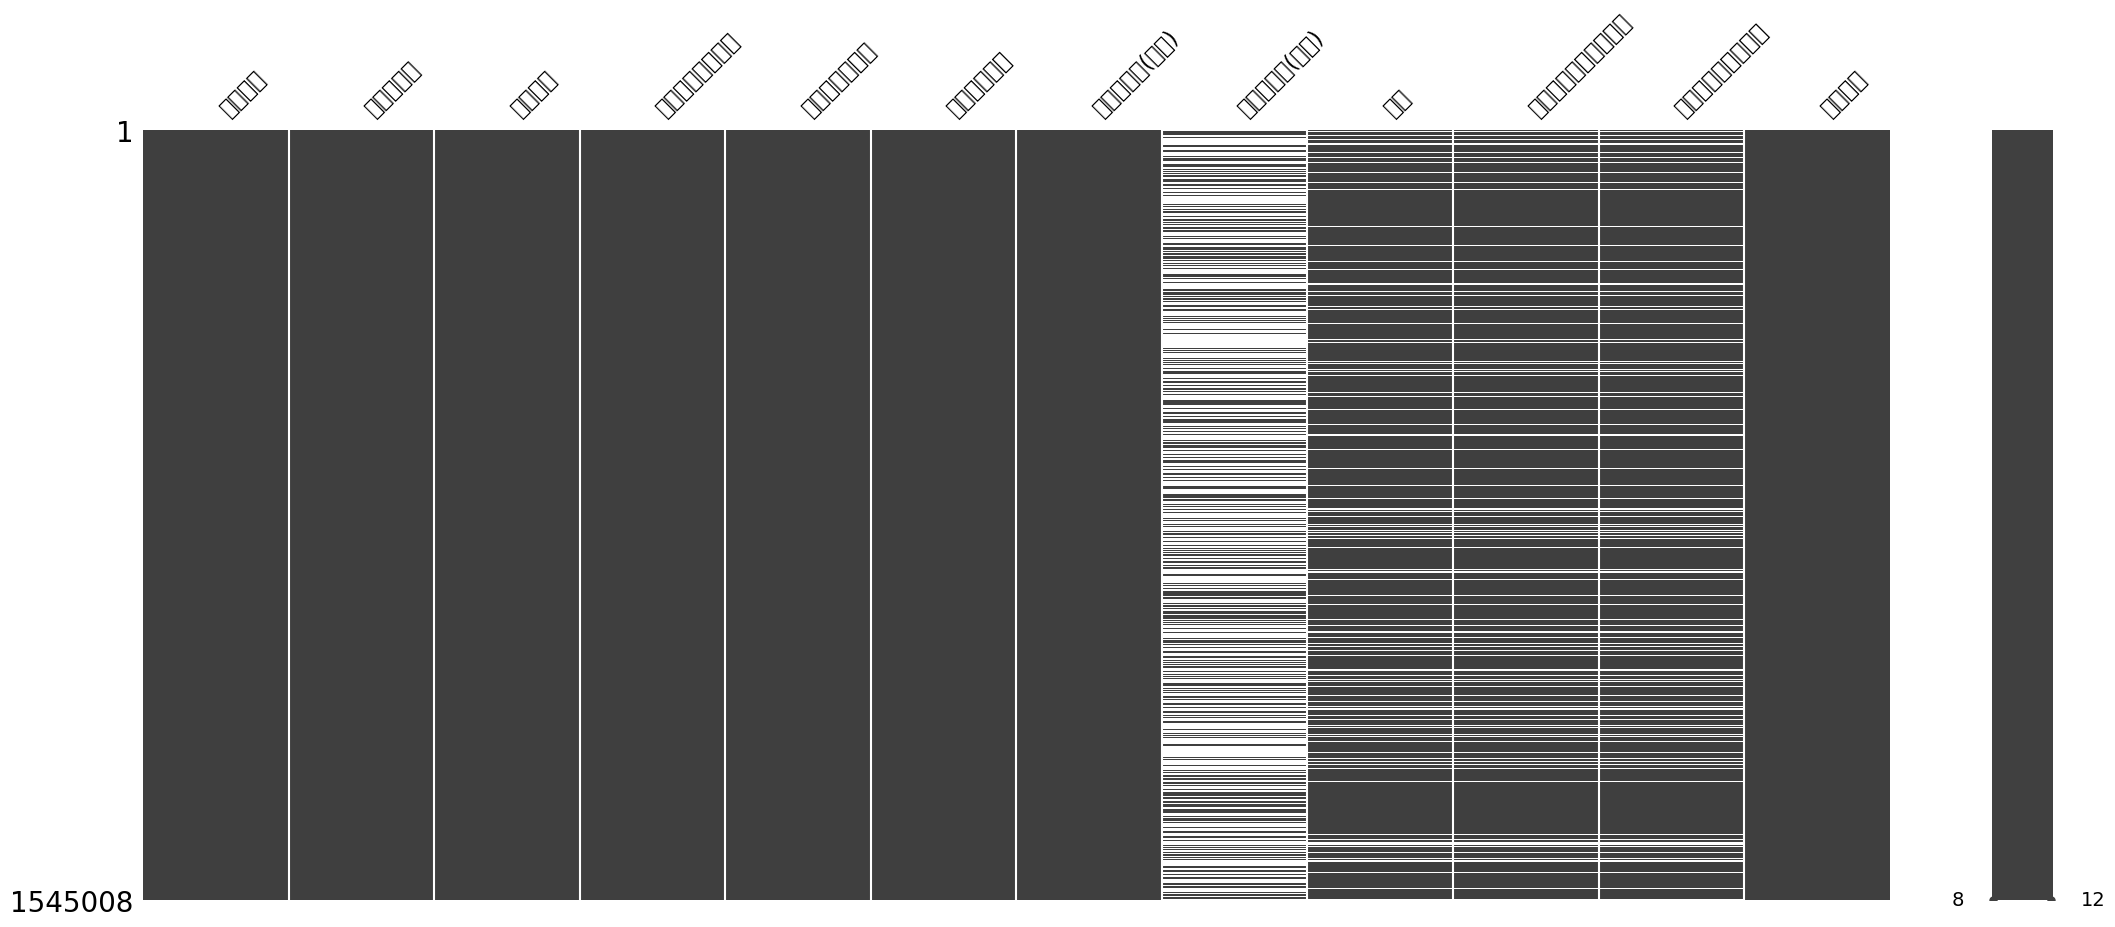

In [185]:
import missingno
missingno.matrix(df)

c:\Users\bluecom001\miniconda3\envs\mp\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from current font.
  fig.canvas.draw()
c:\Users\bluecom001\miniconda3\envs\mp\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from current font.
  fig.canvas.draw()
c:\Users\bluecom001\miniconda3\envs\mp\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 47700 (\N{HANGUL SYLLABLE ME}) missing from current font.
  fig.canvas.draw()
c:\Users\bluecom001\miniconda3\envs\mp\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 45684 (\N{HANGUL SYLLABLE NYU}) missing from current font.
  fig.canvas.draw()
c:\Users\bluecom001\miniconda3\envs\mp\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from current font.
  fig.canvas.draw()
c:\Users\bluecom001\miniconda3\envs\mp\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 50689 (\N{HANGUL SYLL

<AxesSubplot:>

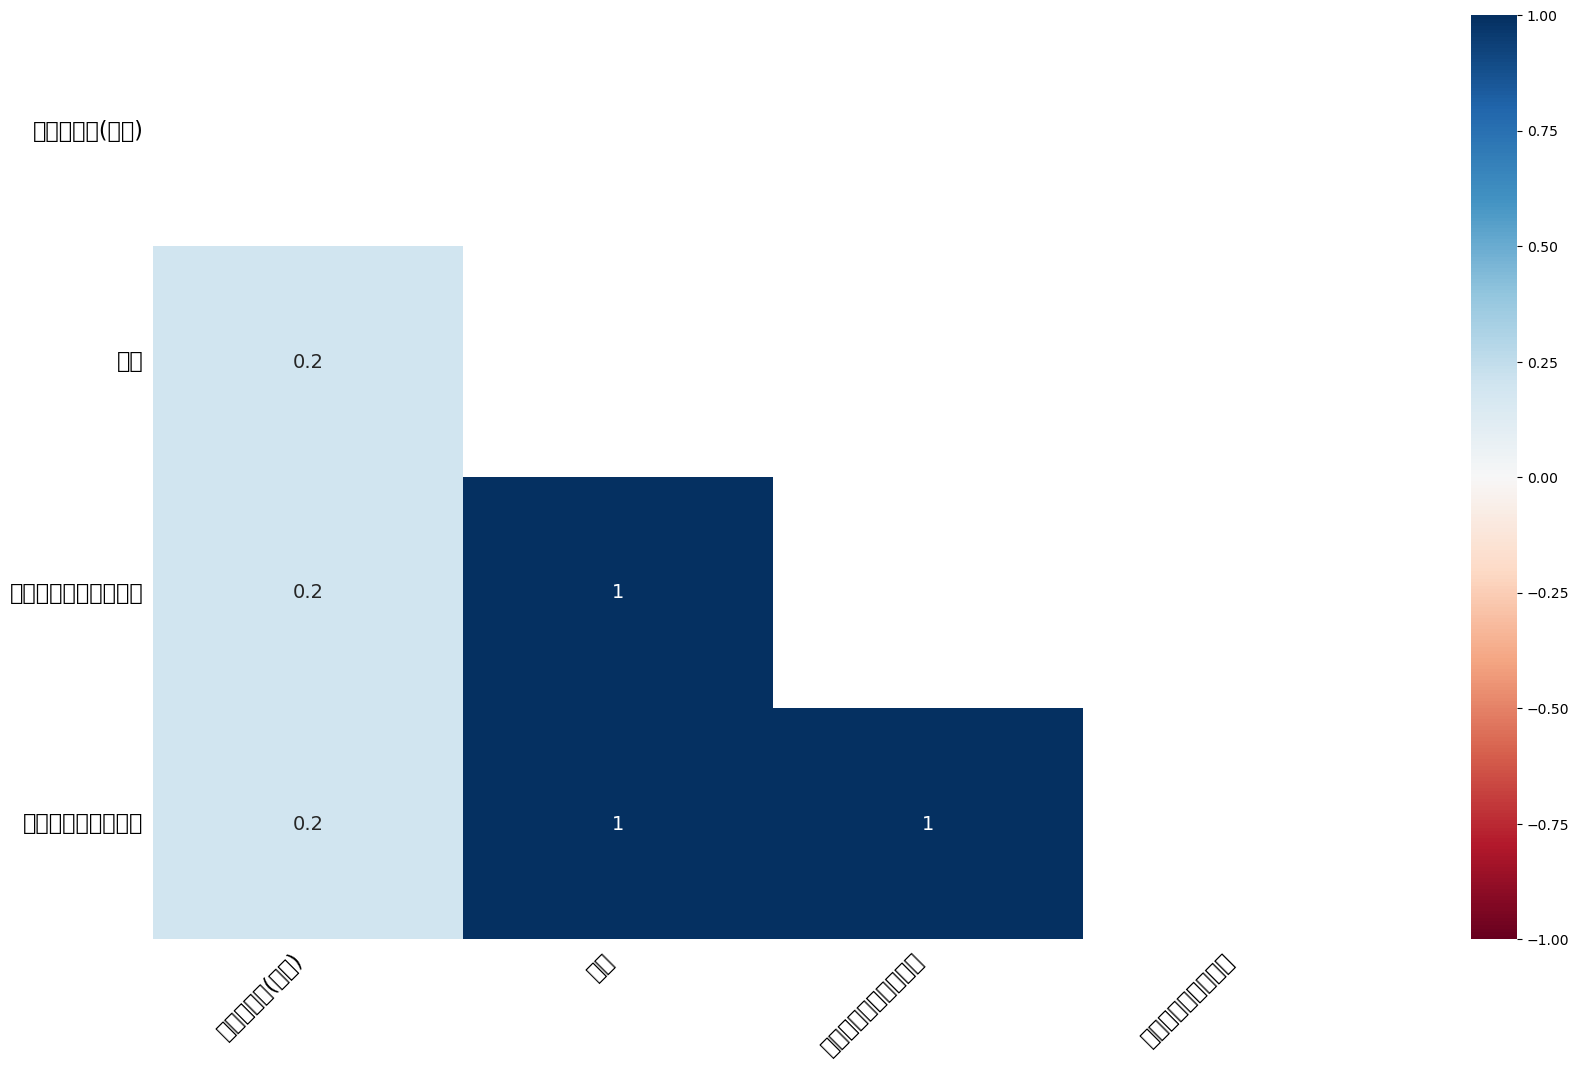

In [186]:
missingno.heatmap(df)

<AxesSubplot:>

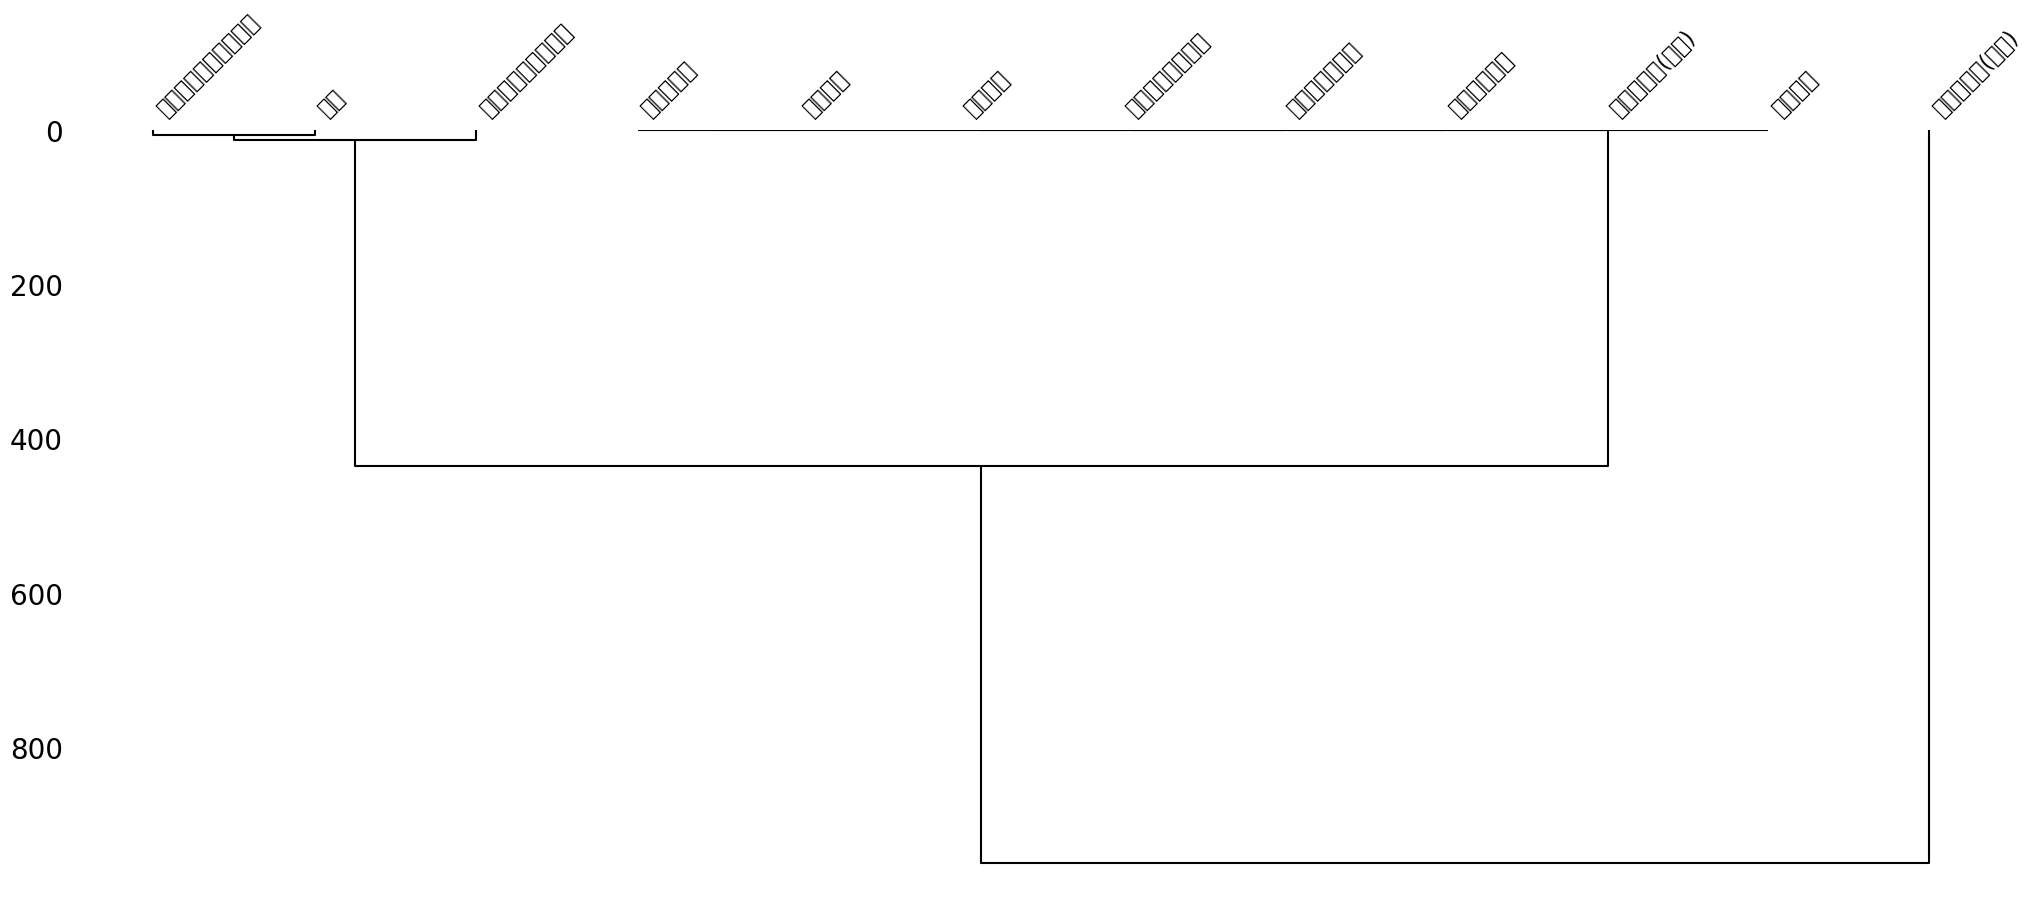

In [187]:
missingno.dendrogram(df)

In [188]:
df[df.isnull() == True].columns

Index(['지급일자', '영업점코드', '영업점명', '식음메뉴그룹코드', '식음메뉴그룹명', '식음메뉴코드', '식음메뉴명(한글)',
       '식음메뉴명(영문)', '성별', '고객여권발급국가코드', '고객여권발급국가명', '주문수량'],
      dtype='object')

In [189]:
df['성별'].value_counts() #최빈값은 'M'

M    1017112
F     338680
Name: 성별, dtype: int64

In [190]:
df['성별'][df['성별'] == 'M']

0          M
1          M
2          M
4          M
5          M
          ..
1545002    M
1545003    M
1545004    M
1545006    M
1545007    M
Name: 성별, Length: 1017112, dtype: object

In [191]:
df['성별'] = df['성별'].fillna('M')

In [192]:
df['성별'].value_counts()

M    1206328
F     338680
Name: 성별, dtype: int64

**주문 수량 상위 10개 보기**

In [193]:
df.sort_values(by='주문수량', ascending=False)[:10]

,지급일자,영업점코드,영업점명,식음메뉴그룹코드,식음메뉴그룹명,식음메뉴코드,식음메뉴명(한글),식음메뉴명(영문),성별,고객여권발급국가코드,고객여권발급국가명,주문수량
1446287,2023-01-27,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2911
1202737,2022-12-20,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2910
1008673,2022-12-27,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2910
647787,2023-01-03,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2881
1447299,2023-01-17,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2880
1105883,2022-11-16,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2880
83794,2020-08-18,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2593
1440888,2022-07-06,CX,코엑스,2011,음료,2057,펩시콜라,NaN,M,NaN,NaN,2560
1440729,2022-01-18,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2441
644530,2021-12-22,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2436


**`value_counts()`와 `groupby` 활용하기**

In [194]:
df['영업점명'].value_counts()

코엑스    610732
드래곤    532755
롯데     401521
Name: 영업점명, dtype: int64

In [195]:
df['식음메뉴명(한글)'].value_counts()

계절과일(VIP)                         33083
생맥주                               25995
펩시콜라                              16658
흑후추스테이크                           13740
미에로화이바                            13459
                                  ...  
문배술                                   1
베이컨토마토샌드위치                            1
잔치국수                                  1
GOLD EVENT 메비우스스카이블루6MG(4500원)        1
GOLD EVENT 히츠 퍼플라벨(4500원)             1
Name: 식음메뉴명(한글), Length: 1101, dtype: int64

In [196]:
df['성별'].value_counts()

M    1206328
F     338680
Name: 성별, dtype: int64

In [197]:
df['고객여권발급국가명'].value_counts()

중국            346182
일본            173569
미국            165226
대한민국(영주권자)    158386
대만            119346
               ...  
볼리비아               2
마케도니아 공화국          1
체코공화국              1
슬로바키아              1
슬로베이아              1
Name: 고객여권발급국가명, Length: 106, dtype: int64

In [198]:
print(df.groupby(df['영업점명'])['주문수량'].sum())
print(df.groupby(df['영업점명'])['주문수량'].mean())

영업점명
드래곤    5489744
롯데     2020134
코엑스    5067045
Name: 주문수량, dtype: int64
영업점명
드래곤    10.304444
롯데      5.031204
코엑스     8.296675
Name: 주문수량, dtype: float64


In [199]:
df.groupby(df['식음메뉴명(한글)'])['주문수량'].sum()

식음메뉴명(한글)
(1인분)             8818
(BAR)               84
(NO ICE)          1406
(NO SUGAR)        3972
(더블)               623
                 ...  
히츠 엠버라벨(아이코스)     4094
히츠 퍼플라벨(아이코스)    13548
히츠그린                88
히츠실버                 4
힘내삼드링크세트(VIP)     6685
Name: 주문수량, Length: 1101, dtype: int64

In [200]:
df.groupby(df['성별'])['주문수량'].sum()

성별
F      698291
M    11878632
Name: 주문수량, dtype: int64

In [201]:
df.groupby(df['고객여권발급국가명'])['주문수량'].sum()

고객여권발급국가명
그레나다            14
그리스             10
나이지리아           25
남아프리카 공화국       77
네덜란드          3626
             ...  
핀랜드             11
필리핀          27737
헝가리             27
호주           36888
홍콩            9765
Name: 주문수량, Length: 106, dtype: int64

**`지급일자`컬럼을 날짜형식으로 변경하기**

In [202]:
df['지급일자'] = pd.to_datetime(df['지급일자'])

In [203]:
df['year'],df['month'],df['day'] = df['지급일자'].dt.year, df['지급일자'].dt.month, df['지급일자'].dt.day

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545008 entries, 0 to 1545007
Data columns (total 15 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   지급일자        1545008 non-null  datetime64[ns]
 1   영업점코드       1545008 non-null  object        
 2   영업점명        1545008 non-null  object        
 3   식음메뉴그룹코드    1545008 non-null  int64         
 4   식음메뉴그룹명     1545008 non-null  object        
 5   식음메뉴코드      1545008 non-null  int64         
 6   식음메뉴명(한글)   1545008 non-null  object        
 7   식음메뉴명(영문)   603104 non-null   object        
 8   성별          1545008 non-null  object        
 9   고객여권발급국가코드  1355826 non-null  object        
 10  고객여권발급국가명   1355684 non-null  object        
 11  주문수량        1545008 non-null  int64         
 12  year        1545008 non-null  int64         
 13  month       1545008 non-null  int64         
 14  day         1545008 non-null  int64         
dtypes: datetime64[ns](1), int64(6), 

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df['식음메뉴명(영문)'] = df['식음메뉴명(영문)'].fillna("None")

In [68]:
df['고객여권발급국가코드'].value_counts()[:5]

CHN    346182
JPN    173569
USA    165226
KOR    158386
TWN    119346
Name: 고객여권발급국가코드, dtype: int64

**식음메뉴명(영문) 컬럼의 결측치를 한글명으로 채우기**

In [158]:
df['식음메뉴명(영문)']= df['식음메뉴명(영문)'].fillna(df['식음메뉴명(한글)'])

In [206]:
df['kor_eng'] = df['식음메뉴명(한글)'] + "" + df['식음메뉴명(영문)']
df['kor_eng']

0                    전복미역국Seaweed Soup with Abalone(전복미역국)
1                                                      NaN
2                           계절과일(VIP)Seasonal Fresh Fruits
3                                                      NaN
4          주꾸미삼겹살볶음Stir-fried Spicy Pork with Baby Octopus
                                ...                       
1545003                                                NaN
1545004                     계절과일(VIP)Seasonal Fresh Fruits
1545005                                                NaN
1545006                                                NaN
1545007                                                NaN
Name: kor_eng, Length: 1545008, dtype: object

In [215]:
import re

df['식음메뉴명_영문'] = df.kor_eng.str.extract('([ㄱ-ㅎ가-힣]+)')

In [222]:
df['영문'] = df['식음메뉴명(영문)'].fillna(df['식음메뉴명(한글)'])

In [225]:
# df.drop('식음메뉴명_영문', axis=1, inplace = True)
df.drop('kor_eng', axis=1, inplace = True)

In [226]:
df

,지급일자,영업점코드,영업점명,식음메뉴그룹코드,식음메뉴그룹명,식음메뉴코드,식음메뉴명(한글),식음메뉴명(영문),성별,고객여권발급국가코드,고객여권발급국가명,주문수량,year,month,day,영문
0,2019-03-25,HT,드래곤,1002,라이스류,1459,전복미역국,Seaweed Soup with Abalone(전복미역국),M,CHN,중국,47,2019,3,25,Seaweed Soup with Abalone(전복미역국)
1,2019-03-05,CX,코엑스,2011,음료,2116,아이스티,NaN,M,JPN,일본,3,2019,3,5,아이스티
2,2019-03-05,HT,드래곤,1004,VIP안주,1028,계절과일(VIP),Seasonal Fresh Fruits,M,JPN,일본,7,2019,3,5,Seasonal Fresh Fruits
3,2019-02-24,HT,드래곤,9001,기타,9030,페리에워터,NaN,F,CHN,중국,1,2019,2,24,페리에워터
4,2019-03-16,CX,코엑스,1002,라이스류,1316,주꾸미삼겹살볶음,Stir-fried Spicy Pork with Baby Octopus,M,CHN,중국,31,2019,3,16,Stir-fried Spicy Pork with Baby Octopus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545003,2023-06-01,LT,롯데,2011,음료,2212,생강차,NaN,M,CHN,중국,1,2023,6,1,생강차
1545004,2023-06-02,LT,롯데,9001,기타,1028,계절과일(VIP),Seasonal Fresh Fruits,M,TWN,대만,1,2023,6,2,Seasonal Fresh Fruits
1545005,2023-05-20,LT,롯데,9001,기타,9002,물수건(COLD)VIP,NaN,M,NaN,NaN,1,2023,5,20,물수건(COLD)VIP
1545006,2023-06-07,CX,코엑스,2012,커피,2124,카페오레(카페라떼),NaN,M,KOR,대한민국(영주권자),1,2023,6,7,카페오레(카페라떼)


### **정규분포와 왜도, 첨도**
* 표준정규분포: 평균이 0, 표준편차가 1인 정규 분포
    * **표준화** 과정을 거치면 모든 정규분포를 표준정규분포의 형태로 나타낼 수 있다.  
* 관측값과 평균값의 오차를 계산하여 weight값을 정할 때 표준정규분포를 따르는 값으로 지정함

In [229]:
import numpy as np

# 평균과 표준편차 지정
mean = 0
std_dev = 1

# 정규분포에 맞는 난수 1000개 생성
random_numbers = np.random.normal(mean, std_dev, 1000)

# 결과 확인
print(random_numbers[:10])


[-0.92807063  2.62136133  0.28411448 -1.10939411  0.53332287 -1.59466142
  0.9066889   0.79349132 -1.20948525 -1.01317403]
